In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Fontconfig error: Cannot load default config file: No such file: (null)


In [3]:
def dia_del_any(data):
    resultat = data.dt.day + data.dt.month*12
    return resultat

In [4]:
def netejar_dades():

    df = pd.read_excel("consumo_material_clean.xlsx")
    df.head()
    df['NUMERO'] = df['NUMERO'].str.split('/')
    df['NUMERO'] = df['NUMERO'].str[0]
    df['CATEGORIA'] = df['CODIGO'].str[0]
    df['CODIGO'] = df['CODIGO'].str[1::]
    df['ANY'] = pd.to_datetime(df['FECHAPEDIDO']).dt.year
    df['ORIGEN'] = df['ORIGEN'].str.split('-')
    df['REGION_ORIGEN'] = df['ORIGEN'].str[0]
    df['HOSPITAL_ORIGEN'] = df['ORIGEN'].str[1]
    df['DEPARTAMENT_ORIGEN'] = df['ORIGEN'].str[2]
    df.head()

netejar_dades()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [45]:
df2 = pd.read_excel('consumo_material_clean.xlsx')
df2['CATEGORIA'] = df2['CODIGO'].str[0]
df2 = df2[['CATEGORIA', 'CANTIDADCOMPRA', 'FECHAPEDIDO', 'CODIGO']]
dfB = df2.where(df2['CATEGORIA'] == 'B').dropna()

dfB['FECHAPEDIDO'] = pd.to_datetime(dfB['FECHAPEDIDO'])
dfB['MES'] = dfB['FECHAPEDIDO'].dt.month
dfB = dfB.groupby(['MES', 'CODIGO'])['CANTIDADCOMPRA'].sum()

dfB


MES  CODIGO
1    B40558     293.0
     B41691    5690.0
2    B40558     285.0
     B41691    4900.0
3    B40558     340.0
     B41691    4850.0
4    B40558     302.0
     B41691    9100.0
5    B40558     356.0
     B41691    8070.0
6    B40558     350.0
     B41691    6480.0
7    B40558     172.0
     B41691    6900.0
8    B40558     245.0
     B41691    6380.0
9    B40558     225.0
     B41691    7380.0
10   B40558     301.0
     B41691    6800.0
11   B40558     335.0
     B41691    5960.0
12   B40558     300.0
     B41691    6280.0
Name: CANTIDADCOMPRA, dtype: float64

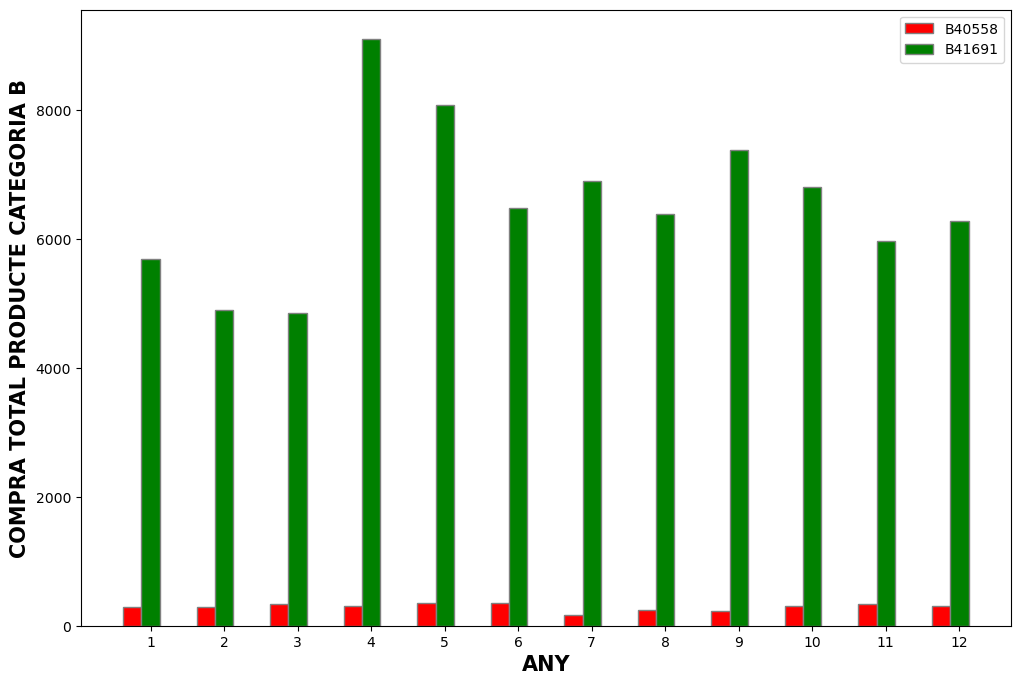

In [59]:
valors_primer = np.zeros(12)
valors_segon = np.zeros(12)
j = 0
k = 0
for i in range(len(dfB)):
    if i%2 == 0:
        valors_primer[j] = list(dfB)[i]
        j += 1
    else:
        valors_segon[k] = list(dfB)[i]
        k += 1

mesos = np.arange(1, 13)

barWidth = 0.25
fig = plt.subplots(figsize=(12,8))

br1 = np.arange(len(valors_primer)) 
br2 = [x + barWidth for x in br1] 


plt.bar(br1, valors_primer, color ='r', width = barWidth, 
        edgecolor ='grey', label ='B40558') 
plt.bar(br2, valors_segon, color ='g', width = barWidth, 
        edgecolor ='grey', label ='B41691') 

plt.xlabel('ANY', fontweight ='bold', fontsize = 15) 
plt.ylabel('COMPRA TOTAL PRODUCTE CATEGORIA B', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(valors_primer))], 
        mesos)

plt.legend()
plt.show()
